## Installing Libraries
We'll be installing list of libraries needed fo image classification purpose. We'll be installing torch and torchvision which are main libraries for pytorch framework. torchvision is fo handling image manipulation and also provides pretrained image classification models.

We'll also need numpy, pandas, matplotlib, pillow and scikit-learn.matplotlib is needed for displaying images.pillow is for loading images and manipulating them. scikit-learn will e used for generating confusion matrix.

In [1]:
!pip install torch torchvision
!pip install numpy pandas matplotlib pillow sklearn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt ## Plotting library

import torch  ## Main torch library which provides functionalities for creating deep learning models.
import torch.nn as nn ## provides functionalities for creating neural network models and layers.
import torch.nn.functional as F
import torch.optim as optim ## Provides functionalities for optimizers like SGD, Adam, etc.
from torch.utils.data import dataloader ## Utility for loading data from folders.

import torchvision ## Library responsible for handling image related tasks.
from torchvision import models, datasets, transforms

from sklearn import metrics
from PIL import Image
import os
import sys
import shutil
import glob
import warnings
from IPython.core.display import display, HTML
print(os.listdir("../input")) ## Kaggle stores all dataset in this directory.

print(torch.__version__) 
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu') ## We check whether GPU is available or not and set device accordingly.
print('Cuda available : '+ str((device.type == 'cuda')))

['unseen-images', 'image-folders']
1.0.1.post2
Cuda available : True


We have defined dictionary below which is mapping from tag name to corresponding html contents which will stored as HTML file. Our model will first find out tag name and then using this dictionary it'll convert tag to appropriate HTML content and save it as HTML file.

In [3]:
tag_to_html = {'body_tag': '<!DOCTYPE html>\
                            <html>\
                            <head>\
                            <title>Shape To HTML</title>\
                            </head>\
                            <body>\
                            This is html body.\
                            </body>\
                            </html>',
                'button_tag':'<!DOCTYPE html>\
                                <html>\
                                <body>\
                                <button type="button" onclick="alert("Hello world!")">Click Me!</button>\
                                </body>\
                                </html>',
               "text_tag": "<!DOCTYPE html>\
                                <html>\
                                <head>\
                                <title>Shape To HTML</title>\
                                </head>\
                                <body>\
                                This is html text tag.\
                                </body>\
                                </html>",
               'heading_and_image_tag': "<!DOCTYPE html>\
                                            <html>\
                                            <head>\
                                            <title>Shape To HTML</title>\
                                            </head>\
                                            <body>\
                                            <h1>Heading & Image tag</h1>\
                                            <img src='image_name.jpg'  width='500' height='333'>\
                                            </body>\
                                        </html>",
               "heading_image_and_table_tag": "<!DOCTYPE html>\
                                                <html>\
                                                <head>\
                                                <style>\
                                                table, th, td {\
                                                  border: 1px solid black;\
                                                  border-collapse: collapse;\
                                                }\
                                                th, td {\
                                                  padding: 5px;\
                                                  text-align: left;    \
                                                }\
                                                </style>\
                                                </head>\
                                                <body>\
                                                <h2>The heading, image & table Element</h2>\
                                                <img src='image_name.jpg'  width='500' height='333'>\
                                                <table style='width:100%'>\
                                                  <tr>\
                                                    <th>Name</th>\
                                                    <th colspan='2'>Telephone</th>\
                                                  </tr>\
                                                  <tr>\
                                                    <td>Bill Gates</td>\
                                                    <td>55577854</td>\
                                                    <td>55577855</td>\
                                                  </tr>\
                                                </table>\
                                                </body>\
                                                </html>",
               "image_tag": "<!DOCTYPE html>\
                                <html>\
                                <head>\
                                <title>Shape To HTML</title>\
                                </head>\
                                <body>\
                                <img src='image_name.jpg'  width='500' height='333'>\
                                </body>\
                                </html>",
               "nav_tag" : "<!DOCTYPE html>\
                                <html>\
                                <body>\
                                <nav>\
                                <a href='/html/'>HTML</a> |\
                                <a href='/css/'>CSS</a> |\
                                <a href='/js'>JavaScript</a> |\
                                <a href='/jquery/'>jQuery</a>\
                                </nav>\
                                </body>\
                                </html>",
               "table_tag":"<!DOCTYPE html>\
                            <html>\
                            <head>\
                            <style>\
                            thead {color:green;}\
                            tbody {color:blue;}\
                            tfoot {color:red;}\
                            table, th, td {\
                              border: 1px solid black;\
                            }\
                            </style>\
                            </head>\
                            <body>\
                            <table>\
                              <thead>\
                                <tr>\
                                  <th>Month</th>\
                                  <th>Savings</th>\
                                </tr>\
                              </thead>\
                              <tbody>\
                                <tr>\
                                  <td>January</td>\
                                  <td>$100</td>\
                                </tr>\
                                <tr>\
                                  <td>February</td>\
                                  <td>$80</td>\
                                </tr>\
                              </tbody>\
                              <tfoot>\
                                <tr>\
                                  <td>Sum</td>\
                                  <td>$180</td>\
                                </tr>\
                              </tfoot>\
                            </table>\
                            </body>\
                            </html>"
              }

We check if `shapes` and `image_folders` directory already exists. If they exists then we delete it for fresh start.

In [4]:
if os.path.exists('shapes'):
    print('Deleting Shapes Directory if exists already from last run')
    shutil.rmtree('shapes')
if os.path.exists('image_folders'):
    print('Deleting image_folders Directory if exists already from last run')
    shutil.rmtree('image_folders')

When we create dataset and attach it to this kernel then itll be available in `../input` directory. We'll use list command to check its contents.

In [5]:
%ls ../input/image-folders/image_folders/

body_tag/    heading_tag&image_tag/  nav_tag/    text_tag/
button_tag/  image_tag/              table_tag/


We'll copy `image_folders` from `../input/image-folders` to current directory for our processing purpose.

In [6]:
%ls ../input
!cp -r ../input/image-folders/image_folders/ .

image-folders/  unseen-images/


Lets verify that `image_folders` got copied successfully.

In [7]:
%ls

__notebook__.ipynb  __output__.json  image_folders/


We'll rename folder named `heading_tag&image_tag` as it has special character `&` which is not valid name for directories and can cause failures in future.

In [8]:
%ls image_folders
os.rename('image_folders/heading_tag&image_tag','image_folders/heading_and_image_tag')
%ls image_folders

body_tag/    heading_tag&image_tag/  nav_tag/    text_tag/
button_tag/  image_tag/              table_tag/
body_tag/    heading_and_image_tag/  nav_tag/    text_tag/
button_tag/  image_tag/              table_tag/


## Creating Folder Structure For Training/Validation/Testing Purpose Of Model.

We have defined below method which will be responsible for creating data structure for our model and moving files into particular folders.

We'll be creating new directory called `shapes`. It'll have 3 folders.
1. train
2. val
3. test

Each of train/val/test will have same 7 subfolders corresponding to 7 shapes as that of image_folders. We'll then move 80% of images to train folder, 10% will be moved to val folder and remaining 10% to test folder. We'll be providing method 2 input direcotries (src-refers to direcotry where all images are currently residing, dest-refers to directory where iages will be copied).

In [9]:
def create_ml_file_strcuture_and_move_files(src, dest):
    ## We create first 3 top level directories under dest directory.
    os.makedirs(os.path.join(dest,'train'), exist_ok=True)## Creates subdirectory like /shapes/train
    os.makedirs(os.path.join(dest,'val'), exist_ok=True)## Creates subdirectory like /shapes/val
    os.makedirs(os.path.join(dest,'test'), exist_ok=True)## Creates subdirectory like /shapes/test
    
    ## We now create 7 sub directories under main 3 directories under dest and move files according to propotion from src to dest.
    for directory in os.listdir(src):
        os.makedirs(os.path.join(dest,'train',directory), exist_ok=True) ## Creates subdirectory like /shapes/train/text_tag
        os.makedirs(os.path.join(dest,'val',directory), exist_ok=True)## Creates subdirectory like /shapes/val/text_tag
        os.makedirs(os.path.join(dest,'test',directory), exist_ok=True)## Creates subdirectory like /shapes/test/text_tag
        init_path = os.path.join(src, directory)
        all_files = os.listdir(init_path) ## Getting all files from src subdirectory of tag.
        n = len(all_files) ## Number of files for particular tag.
        for file in all_files[:int(0.8*n)]: ## Logic to move 80% to shapes/train directory
            shutil.copy(os.path.join(src,directory,file),os.path.join(dest,'train',directory))
        for file in all_files[int(0.8*n):int(0.9*n)]: ## Logic to move 10% to shapes/val directory
            shutil.copy(os.path.join(src,directory,file),os.path.join(dest,'val',directory))
        for file in all_files[int(0.9*n):]: ## Logic to move 10% to shapes/test directory
            shutil.copy(os.path.join(src,directory,file),os.path.join(dest,'test',directory))

create_ml_file_strcuture_and_move_files('image_folders','shapes')

We have list of print statements below which verifies that whether above function properly created folder structure and moved files properly.

In [10]:
print('List of subdirs in Images folder : %d'%len(os.listdir('image_folders')))
print('List of subdirs in dogs/train folder : %d'%len(os.listdir('shapes/train')))
print('List of subdirs in dogs/val folder : %d'%len(os.listdir('shapes/val')))
print('List of subdirs in dogs/test folder : %d'%len(os.listdir('shapes/test')))
print('List of JPGs in original Images directory : %d'%len(glob.glob('image_folders/*/*.jpg')))
print('List of JPGs in dogs sub directories : %d'%len(glob.glob('shapes/*/*/*.jpg')))

print("List of JPGs in Heading & Image Tag of train set: %d"%len(os.listdir('shapes/train/heading_and_image_tag')))
print("List of JPGs in Heading & Image Tag of validation set : %d"%len(os.listdir('shapes/val/heading_and_image_tag')))
print("List of JPGs in Heading & Image Tag of test set : %d"%len(os.listdir('shapes/test/heading_and_image_tag')))

print("List of JPGs in Image Tag of train set: %d"%len(os.listdir('shapes/train/image_tag')))
print("List of JPGs in Image Tag of validation set: %d"%len(os.listdir('shapes/val/image_tag')))
print("List of JPGs in Image Tag of test set: %d"%len(os.listdir('shapes/test/image_tag')))

List of subdirs in Images folder : 7
List of subdirs in dogs/train folder : 7
List of subdirs in dogs/val folder : 7
List of subdirs in dogs/test folder : 7
List of JPGs in original Images directory : 1744
List of JPGs in dogs sub directories : 1744
List of JPGs in Heading & Image Tag of train set: 428
List of JPGs in Heading & Image Tag of validation set : 54
List of JPGs in Heading & Image Tag of test set : 54
List of JPGs in Image Tag of train set: 376
List of JPGs in Image Tag of validation set: 47
List of JPGs in Image Tag of test set: 47


## Initializing Dataset And Creating Transformations On Images
Below we have defined `data_trainsform` which is transformation that will be applied to all images. As we'll be using VGG model for our purpose, it expects images to be of size (224 px,224 px). It also need each RGB channel of image to be normalized. Normalization refers to subtraction of mean and division by standard deviation. We first resize all images to 256x256 pixel , then we crop center part of image of size 224x224 pixel, then we convert image to tensor as needed by model as input and then we normalize tensor.

We have defined `dsets` dictionary which holds datasets for train, val and test parts. We use `ImageFolder` class provided by torchvision.datasets module to load images from particular folders and apply transformation at same time.

We then defined `loaders` dictionary which is another wrapper around dataset which will group images into batches defined by `batch_size` and shuffle them based on `shuffle` flag. `num_workers` refers to number of parallel task for loading. We have defined batch size for train dataset as 8 mean batch of 8 images will be trained together.

In [11]:
root_folder = "shapes"

data_transform = transforms.Compose([ transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

dsets = {}
dsets['train'] = datasets.ImageFolder('shapes/train', transform=data_transform)
dsets['val'] = datasets.ImageFolder('shapes/val', transform=data_transform)
dsets['test'] = datasets.ImageFolder('shapes/test', transform=data_transform)
loaders = {}
loaders['train'] = torch.utils.data.DataLoader(dsets['train'], batch_size=8, shuffle=True,num_workers=4)
loaders['val'] = torch.utils.data.DataLoader(dsets['val'], batch_size=8, shuffle=True,num_workers=4)
loaders['test'] = torch.utils.data.DataLoader(dsets['test'], batch_size=1, shuffle=False,num_workers=4)

Below we have defined few dictionaries. shapes_to_idx refers to dictionary of shape names to their index used by model. idx_to_shape is revers of shapes_to_idx. Neural Network will be outputing index for tags which we'll convert to tag names using this dictionary.

In [12]:
shapes = dsets['train'].classes
shapes_to_idx = dsets['train'].class_to_idx
shapes, idx = zip(*dsets['train'].class_to_idx.items())
idx_to_shape = dict(zip(idx, shapes))
idx_to_shape, shapes_to_idx

({0: 'body_tag',
  1: 'button_tag',
  2: 'heading_and_image_tag',
  3: 'image_tag',
  4: 'nav_tag',
  5: 'table_tag',
  6: 'text_tag'},
 {'body_tag': 0,
  'button_tag': 1,
  'heading_and_image_tag': 2,
  'image_tag': 3,
  'nav_tag': 4,
  'table_tag': 5,
  'text_tag': 6})

Lets check size of first few tensors.

In [13]:
for i,(images,labels) in enumerate(loaders['train']):
    if i == 3: break;
    print(images.size(),labels.size())

torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])


Below we are visualizing first few images.

Type of Image : <class 'torch.Tensor'>


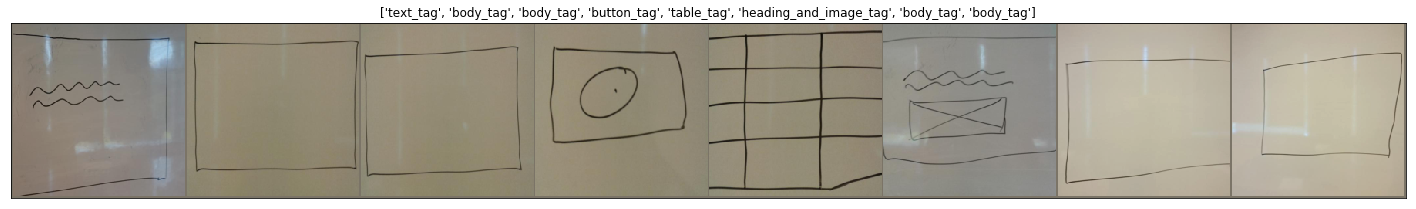

In [14]:
images,labels = next(iter(loaders['train']))
inp = torchvision.utils.make_grid(images)
print('Type of Image : '+ str(type(inp)))
inp = inp.numpy().transpose(1,2,0)
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image = std * inp + mean
iamge = image.clip(0,1)
plt.figure(figsize=(25,5))
plt.imshow(image)
plt.title(str([idx_to_shape[label] for label in labels.numpy()]))
plt.xticks([])
plt.yticks([])
None

## Initializing Model

Below we are using VGG model provided by `torchvision.models` module. VGG is neural network model which was 2nd runner up in imagenet competition of 2014. Authors of VGG has released weights of model and model structure afte competition which many deep learning practitioners uses for training their model. This practice of using existing pre-trained network is called transferred learning. We have passed pretrained as True which will results in downloading weights from internet.

We are also using model as it by modifying it's last layer. VGG model outputs 1000 probabilites as competition had 1000 categories to classify of images. For our purpose we have only 7 categories, so we'll be modfying last layer to output 7 probabilities instead of 1000. We'll also set all other layers `requires_grad` parameters as `False`. Only last layer which we modified will have `requires_grad` as `True`. Reason behind doing this is that all other layers are well trained already and we just need to train last ayer which we modified for our purpose. This way of resuing model architecture and its weights is called Transfer Learning.

We'll also print architecture of VGG at end which is convolution neural network.

In [15]:
vgg = models.vgg16(pretrained=True)
for param in list(vgg.parameters())[:-1]:
    param.requires_grad = False
vgg.classifier[6] = nn.Linear(4096, len(shapes))
vgg = vgg.to(device)
vgg

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /tmp/.torch/models/vgg16-397923af.pth
553433881it [00:24, 22231076.23it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

## Defining Loss Function And Optimization Function

We have defined below loss function which will be used to calculate loss of training/validation and test phases. Loss generally refers to how far our prediction is from actual prediction. `CrossEntropyLoss` is multi-class loss function defined in PyTorch.

We have then defined optimization function which will optimize out parameters so that our model outputs as accuracte label as possible. We have also defined learning rate of 0.001 which will be used to update model weights.

In [16]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=vgg.parameters(), lr = 0.001)

## Training Model
We have defined method below which will be used to train model by providing epochs. 1 epoch refers to one pass through Train and Validation data. We train model number of epochs times and validate it against validation set. We train model through training dataset and then validate it against validation se. We print Train and validation accuracy at each epoch.

In [17]:
def train(epochs):
    for epoch in range(epochs):
        for phase in ['train', 'val']:
            if phase == 'train':
                vgg.train() ## We set model to train phase as it activates layers like Dropout and BatchNormalization.
            else:
                vgg.eval() ## We set model to evaluation phase as it de-activates layers like Dropout and BatchNormalization.

            total_loss = 0.0
            correct_preds = 0

            for i, (images, labels) in enumerate(loaders[phase]):
                images, labels = images.to(device), labels.to(device) ## Translate normal tensor to cuda tensors it GPU is available.
                optimizer.zero_grad() ## At start of each batch we set gradients of loss with respect to parameters to zero.
                with torch.set_grad_enabled(phase == 'train'): ## This enables gradients calculation based on phase.
                    results = vgg.forward(images) ## We do forward pass thorugh batch images.
                    _, predictions = torch.max(results,1) ## We get indexes of max probabilities for each image of batch.
                    loss = loss_function(results, labels) ## We calculation loss based on predicted probabilities and actual labels.

                    if phase == 'train':
                        loss.backward() # Backpropogation execution which calculates gradients for each weight parameter.
                        optimizer.step() ## This step updates weights based on gradients calculated above and learning rate set above.
                #print(i)
                total_loss += loss.item()
                correct_preds += torch.sum(predictions == labels) ## We find out correct predictions.

            print('Epoch : %d'%(epoch+1))
            print('Stage : %s'%phase)
            print('Loss : %f'%total_loss)
            #print(correct_preds.item())
            print('Accuracy : %f'% (int(correct_preds.item()) / len(dsets[phase])))
            print('-'*100)

We initially train model for 3 epochs (3 times pass through train and validation dataset.).

In [18]:
%time train(3)

Epoch : 1
Stage : train
Loss : 220.332109
Accuracy : 0.791483
----------------------------------------------------------------------------------------------------
Epoch : 1
Stage : val
Loss : 12.372260
Accuracy : 0.972763
----------------------------------------------------------------------------------------------------
Epoch : 2
Stage : train
Loss : 86.403926
Accuracy : 0.955947
----------------------------------------------------------------------------------------------------
Epoch : 2
Stage : val
Loss : 6.637336
Accuracy : 0.996109
----------------------------------------------------------------------------------------------------
Epoch : 3
Stage : train
Loss : 57.694673
Accuracy : 0.971610
----------------------------------------------------------------------------------------------------
Epoch : 3
Stage : val
Loss : 4.542125
Accuracy : 0.996109
----------------------------------------------------------------------------------------------------
CPU times: user 9.32 s, sys: 5.08 s

In [19]:
#%time train(2)

We then lowers learning rate and then train model again for 2 epochs.

In [20]:
optimizer.lr = 0.0001
%time train(2)

Epoch : 1
Stage : train
Loss : 43.677878
Accuracy : 0.981889
----------------------------------------------------------------------------------------------------
Epoch : 1
Stage : val
Loss : 3.371192
Accuracy : 0.996109
----------------------------------------------------------------------------------------------------
Epoch : 2
Stage : train
Loss : 35.613618
Accuracy : 0.983847
----------------------------------------------------------------------------------------------------
Epoch : 2
Stage : val
Loss : 2.736776
Accuracy : 0.996109
----------------------------------------------------------------------------------------------------
CPU times: user 5.83 s, sys: 3.36 s, total: 9.19 s
Wall time: 42.5 s


We then reduce learning rate again and then train model again for 1 epoch.

In [21]:
optimizer.lr = 0.00001
%time train(1)

Epoch : 1
Stage : train
Loss : 31.026792
Accuracy : 0.982868
----------------------------------------------------------------------------------------------------
Epoch : 1
Stage : val
Loss : 2.312830
Accuracy : 0.996109
----------------------------------------------------------------------------------------------------
CPU times: user 2.64 s, sys: 1.8 s, total: 4.44 s
Wall time: 20.7 s


## Evaluating Model On Test Dataset.

We have defined below test model which test our models accuracy on test dataset which we have never seen before. Test data set is like production dataset which is never seen by our model.

In [22]:
def test():
    with torch.no_grad(): ## We are setting it to no grads as we don't need gradients during testing.
        correct = 0
        #loss = 0
        for images,labels in loaders['test']: ## We loop through test dataset images
            images,labels = images.to(device), labels.to(device)

            predictions = vgg(images) ## Our model predicts labels for images
            _, preds = torch.max(predictions, 1) ## We take out index of maximum probability.
            correct += torch.sum(preds == labels) ## Summing up correct labels.
        print('Test Set Accuracy : %f'%(correct.item() / len(dsets['test'])))

%time test()

Test Set Accuracy : 0.996109
CPU times: user 964 ms, sys: 296 ms, total: 1.26 s
Wall time: 2.88 s


## Visualizing First Few Test Image Predictions.

We have below defined method which loops through images of test dataset and then prints images with their actual labels and predictions made by our model.

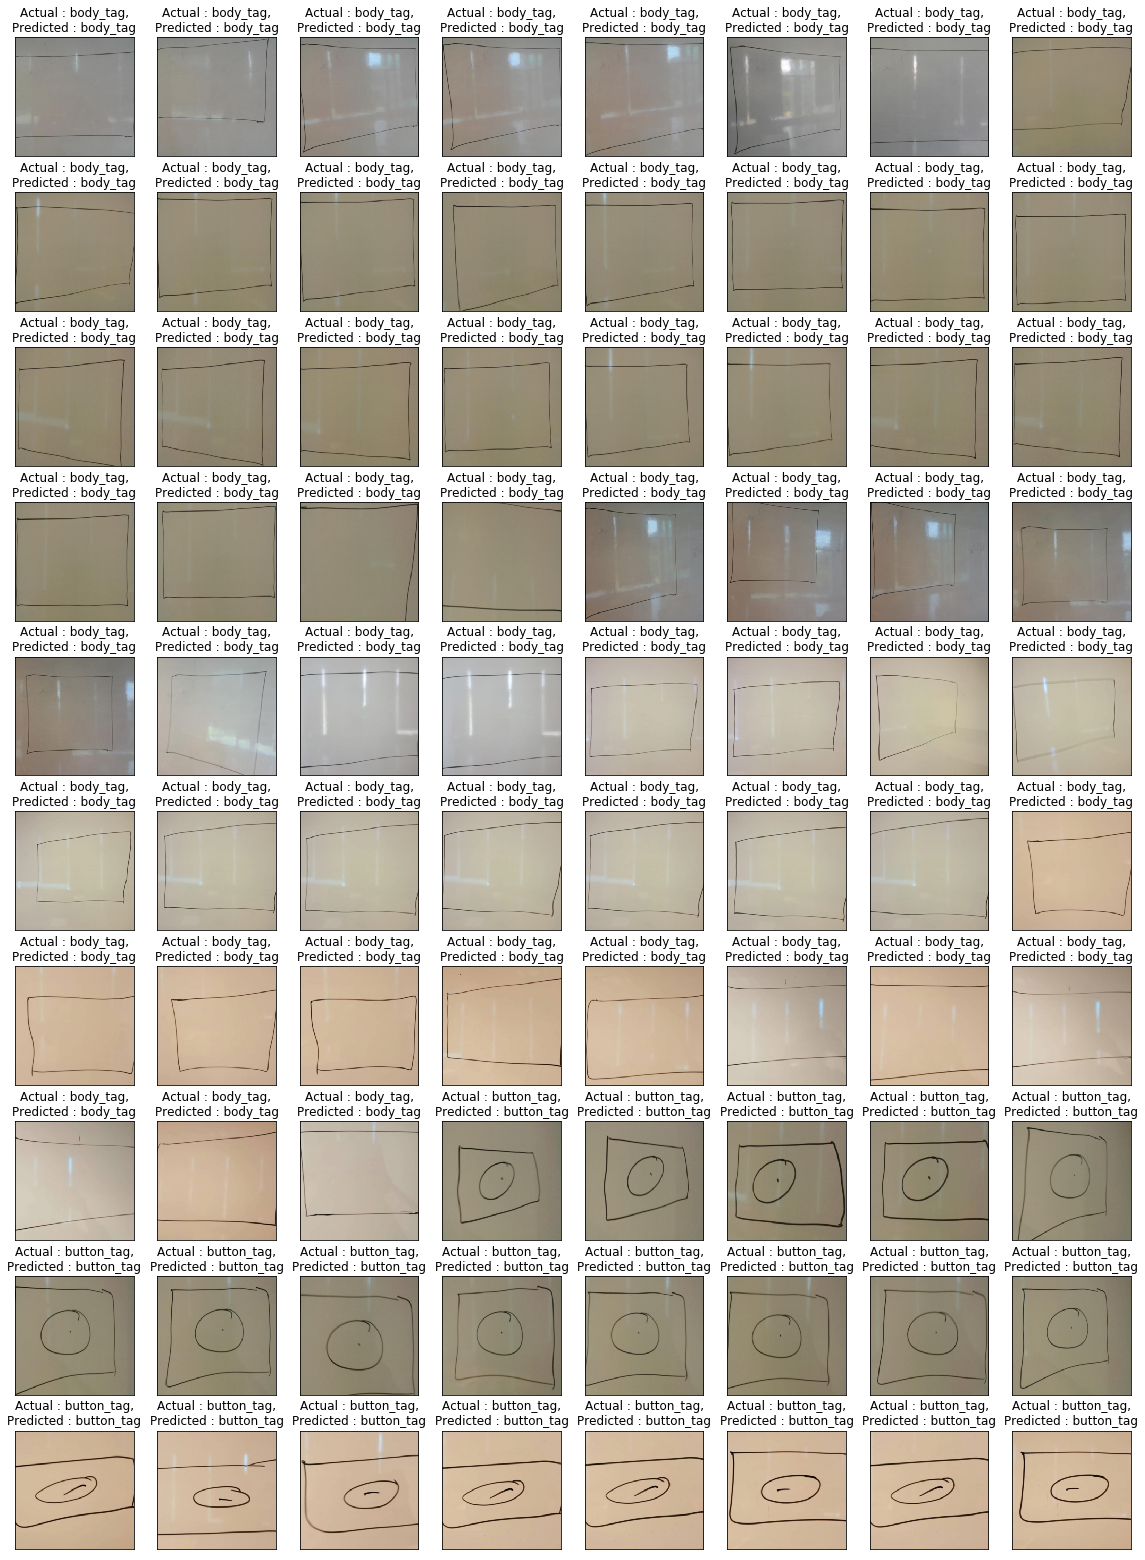

In [23]:
def visualizing_predictions_on_test_data():
    plt.figure(figsize=(20,28))
    with torch.no_grad():
        for i, (image,label) in enumerate(loaders['test']):
            if i == 80:
                break
            plt.subplot(10,8,i+1)
            image,label = image.to(device), label.to(device)

            prediction = vgg(image)
            _, pred = torch.max(prediction,1)
            img = image.to('cpu').numpy()[0].transpose(1,2,0)
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            img = std * img + mean
            plt.imshow(img.clip(0.0,1.0))
            plt.title('Actual : %s,\nPredicted : %s'%(idx_to_shape[int(label.item())], idx_to_shape[int(pred.item())]))
            plt.xticks([])
            plt.yticks([])

visualizing_predictions_on_test_data()

## Defining Method For Making Prediction

We have defined below method named `predict()` which takes as input path to image and then predicts top 5 probabilities and top 5 indexes. `process_image()` method performs same steps that performed by `data_transform` we have defined above. It resize image to 256x256, then does center crop of size 224x224, convert to tensor and then normalize image to make it ready for model input.

In [24]:
def process_image(image,normalize=True):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    img = Image.open(image)
    img = img.convert('RGB')
    img = np.array(img.resize((256,256)).crop((16,16,240,240)))
    to_tensor = transforms.ToTensor()
    img = to_tensor(img)
    img = img.numpy()
    img = img.transpose((1,2,0))
    mean = np.array([0.485,0.456,0.406])
    std = np.array([0.229,0.224,0.225])
    if normalize:
        img = ((img - mean) / std)
    img = img.transpose((2,0,1))
    
    img = torch.tensor(img,dtype=torch.float32)
    return img

def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    with torch.no_grad():
        img = process_image(image_path)
        output = vgg.forward(img.unsqueeze(0).to(device) if len(img.size())==3 else img.to(device))
        top_5_probs,classes = output.topk(topk)
        return top_5_probs, classes

In [25]:
%ls shapes/test/heading_and_image_tag/

20190315_132506.jpg  20190315_132748.jpg  20190315_133605.jpg  DSC_2150.JPG
20190315_132508.jpg  20190315_133252.jpg  20190315_133612.jpg  DSC_2160.JPG
20190315_132558.jpg  20190315_133259.jpg  20190315_133618.jpg  DSC_2163.JPG
20190315_132609.jpg  20190315_133333.jpg  20190315_133629.jpg  DSC_2170.JPG
20190315_132616.jpg  20190315_133340.jpg  20190315_133631.jpg  DSC_2179.JPG
20190315_132644.jpg  20190315_133357.jpg  DSC_1717.JPG         DSC_2181.JPG
20190315_132647.jpg  20190315_133359.jpg  DSC_1723.JPG         DSC_2185.JPG
20190315_132650.jpg  20190315_133403.jpg  DSC_1763.JPG         DSC_2195.JPG
20190315_132700.jpg  20190315_133410.jpg  DSC_1781.JPG         DSC_2201.JPG
20190315_132702.jpg  20190315_133413.jpg  DSC_1795.JPG         DSC_2207.JPG
20190315_132713.jpg  20190315_133451.jpg  DSC_1804.JPG         DSC_2210.JPG
20190315_132716.jpg  20190315_133500.jpg  DSC_1830.JPG         DSC_2219.JPG
20190315_132734.jpg  20190315_133516.jpg  DSC_1861.JPG
20190315_132741.jpg  20190315_133

Below we have set image name in `future_shape_path` variable. We then use `predict()` method defined above to get top 5 probabilities and takes highest probability as out guess. We then use `idx_to_shape` dictionary to find out tag name correcponding to that index. Using tag name we find out html contents of that tag using `tag_to_html` dictionary.

In [26]:
#future_shape_path = 'shapes/test/heading_and_image_tag/20190315_133359.jpg'
unseen_image_root = '../input/unseen-images/'
future_shape_path = os.path.join(unseen_image_root,'20190315_132512.jpg')
prob, idx = predict(future_shape_path,vgg)
#print(idx)
predicted_name = [idx_to_shape[i.item()] for i in idx.data[0]][0]
print(predicted_name)
print(tag_to_html[predicted_name])

heading_and_image_tag
<!DOCTYPE html>                                            <html>                                            <head>                                            <title>Shape To HTML</title>                                            </head>                                            <body>                                            <h1>Heading & Image tag</h1>                                            <img src='image_name.jpg'  width='500' height='333'>                                            </body>                                        </html>


## Generating HTML Files From New Unseen Images.

We have kep all unseen images under `unseen-images` folder which we have uploaded as different dataset. We can upload many images to this dataset. We then loop through each image of that unseen-images dataset, guess tag for each image, get html for that particular tag and save it as `.html` file.

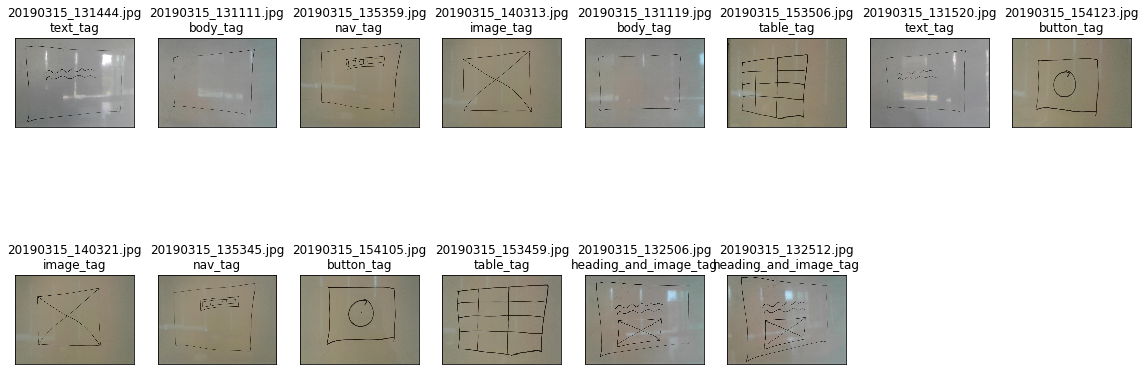

In [27]:
plt.figure(figsize=(20,8))
total_image_count = len(os.listdir(unseen_image_root))
for i, image in enumerate(os.listdir(unseen_image_root),1):
    prob, idx = predict(os.path.join(unseen_image_root,image),vgg)
    predicted_name = [idx_to_shape[i.item()] for i in idx.data[0]][0]
    plt.subplot((total_image_count//8)+1, 8, i)
    plt.imshow(Image.open(os.path.join(unseen_image_root,image)))
    plt.xticks([])
    plt.yticks([])
    plt.title(image+ '\n'+predicted_name)
    with open(image.split('.')[0]+'.html', 'w') as f:
        f.write(tag_to_html[predicted_name])

Below is logic which displays all html files generated from unseen-images folder and show them as hypterlink.

In [28]:
for file in os.listdir('.'):
    if '.html' in file:
        display(HTML("<a href=%s target='_blank'>%s</a>"%(file, file)))

## Visualizing Failed Test Predictions

We have defined below method which loops through all images of testset and display images which are predicted wrong by our model.

<Figure size 1440x1800 with 0 Axes>

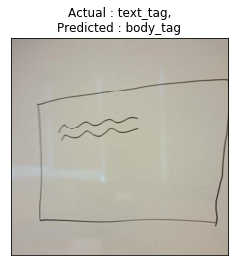

In [29]:
def visualizing_failed_predictions_on_test_data():
    plt.figure(figsize=(20,25))
    with torch.no_grad():
        for i, (image,label) in enumerate(loaders['test']):
            image,label = image.to(device), label.to(device)
            prediction = vgg(image)
            _, pred = torch.max(prediction,1)
            if label.item() != pred.item():
                plt.subplots()
                #print('Actual : %s,\nPredicted : %s'%(idx_to_shape[int(label.item())], idx_to_shape[int(pred.item())]))
                img = image.to('cpu').numpy()[0].transpose(1,2,0)
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                img = std * img + mean
                plt.imshow(img.clip(0.0,1.0))
                plt.title('Actual : %s,\nPredicted : %s'%(idx_to_shape[int(label.item())], idx_to_shape[int(pred.item())]))
                plt.xticks([])
                plt.yticks([]);

visualizing_failed_predictions_on_test_data();

Below code displays image defined by `future_shape_path` variable and displays top 5 probabilities predicted by model.

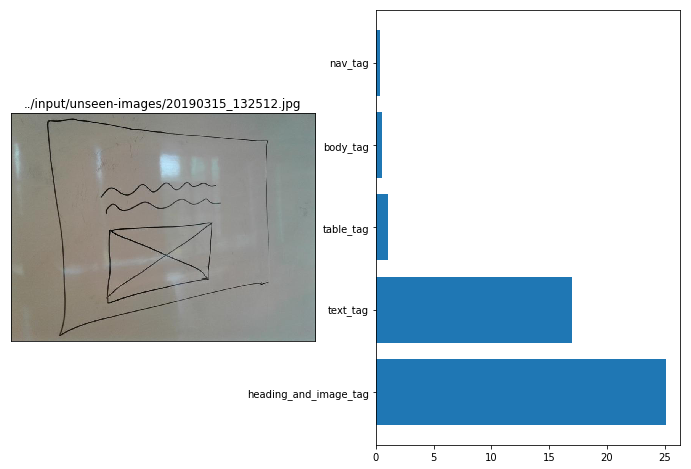

In [30]:
probs2, idx2 = predict(future_shape_path,vgg)
names = [idx_to_shape[i.item()] for i in idx2.data[0]]
probs = probs2.data[0].cpu().numpy()
probs = np.exp(probs)

## Display an image along with the top 5 classes
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(Image.open(future_shape_path))
plt.xticks([])
plt.yticks([])
plt.title(future_shape_path)

plt.subplot(122)
plt.barh(names,probs);

## Saving model for future use
We have below logic which stores current trained model into current directory. This model can be later loaded for future use. We can directly load model from this saved checkpoint and then do prediction directly without everytime training model.

In [31]:
checkpoint_dict = {
    'model_dict': vgg.state_dict(),
    'optimizer' : optimizer.state_dict(),
    'loss' : loss_function.state_dict(),
    'class_to_idx' : dsets['train'].class_to_idx,
}
torch.save(checkpoint_dict, 'vgg_99.pth')

## Load Model From Saved Checkpoint And Make Prediction
Below we have defined logic which loads model from saved checkpoint above. We are also making prediction in next line from this model loaded from checkpoint.

In [32]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    reloaded_model = models.vgg16(pretrained=False).to(device)
    for param in list(reloaded_model.parameters())[:-1]:
        param.requires_grad = False
    reloaded_model.classifier[6] = nn.Linear(4096, len(checkpoint['class_to_idx']))
    reloaded_model.load_state_dict(checkpoint['model_dict'])
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = optim.SGD(reloaded_model.parameters(), lr = 0.00001)
    optimizer.load_state_dict(checkpoint['optimizer'])
    criterion.load_state_dict(checkpoint['loss'])
    #reloaded_model = reloaded_model.to(device)
    return reloaded_model,optimizer,criterion,checkpoint['class_to_idx']

model, optimizer, loss_function, class_to_idx = load_checkpoint('vgg_99.pth')

In [33]:
#future_shape_path = 'shapes/test/heading_and_image_tag/20190315_133359.jpg'
future_shape_path = os.path.join(unseen_image_root,'20190315_132512.jpg')
prob, idx = predict(future_shape_path,model)
print(idx)
predicted_name = [idx_to_shape[i.item()] for i in idx.data[0]][0]
print(predicted_name)
print(tag_to_html[predicted_name])

tensor([[2, 6, 5, 0, 4]], device='cuda:0')
heading_and_image_tag
<!DOCTYPE html>                                            <html>                                            <head>                                            <title>Shape To HTML</title>                                            </head>                                            <body>                                            <h1>Heading & Image tag</h1>                                            <img src='image_name.jpg'  width='500' height='333'>                                            </body>                                        </html>


In [34]:
shutil.rmtree('shapes')
shutil.rmtree('image_folders')